## [範例重點]
了解機器學習建模的步驟、資料型態以及評估結果等流程

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
    - 讀取資料的方法：
        - **使用 pandas 讀取 .csv 檔：**pd.read_csv
        - **使用 numpy 讀取 .txt 檔：**np.loadtxt 
        - **使用 Scikit-learn 內建的資料集：**sklearn.datasets.load_xxx
    - **檢查資料數量：**data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.01796599 0.         0.52229134 0.45974266]


## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

### Wine Dataset (Classification)

In [6]:
wine = datasets.load_wine()

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

predict = clf.predict(x_test)

In [7]:
acc = metrics.accuracy_score(y_test, predict)
print("Acuuracy: ", acc)

Acuuracy:  0.8444444444444444


In [8]:
import pandas as pd

feature_name = wine.feature_names
pd.concat((pd.DataFrame(feature_name, columns=['Features']),pd.DataFrame(clf.feature_importances_, columns=['importance'])),
          axis=1).sort_values(by=['importance'], ascending=False)

,Features,importance
12,proline,0.388650
9,color_intensity,0.337025
11,od280/od315_of_diluted_wines,0.167408
0,alcohol,0.062866
4,magnesium,0.044051
1,malic_acid,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.000000
5,total_phenols,0.000000
6,flavanoids,0.000000


### [Creating and Visualizing Decision Trees with Python](https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

C:\Users\tony8\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


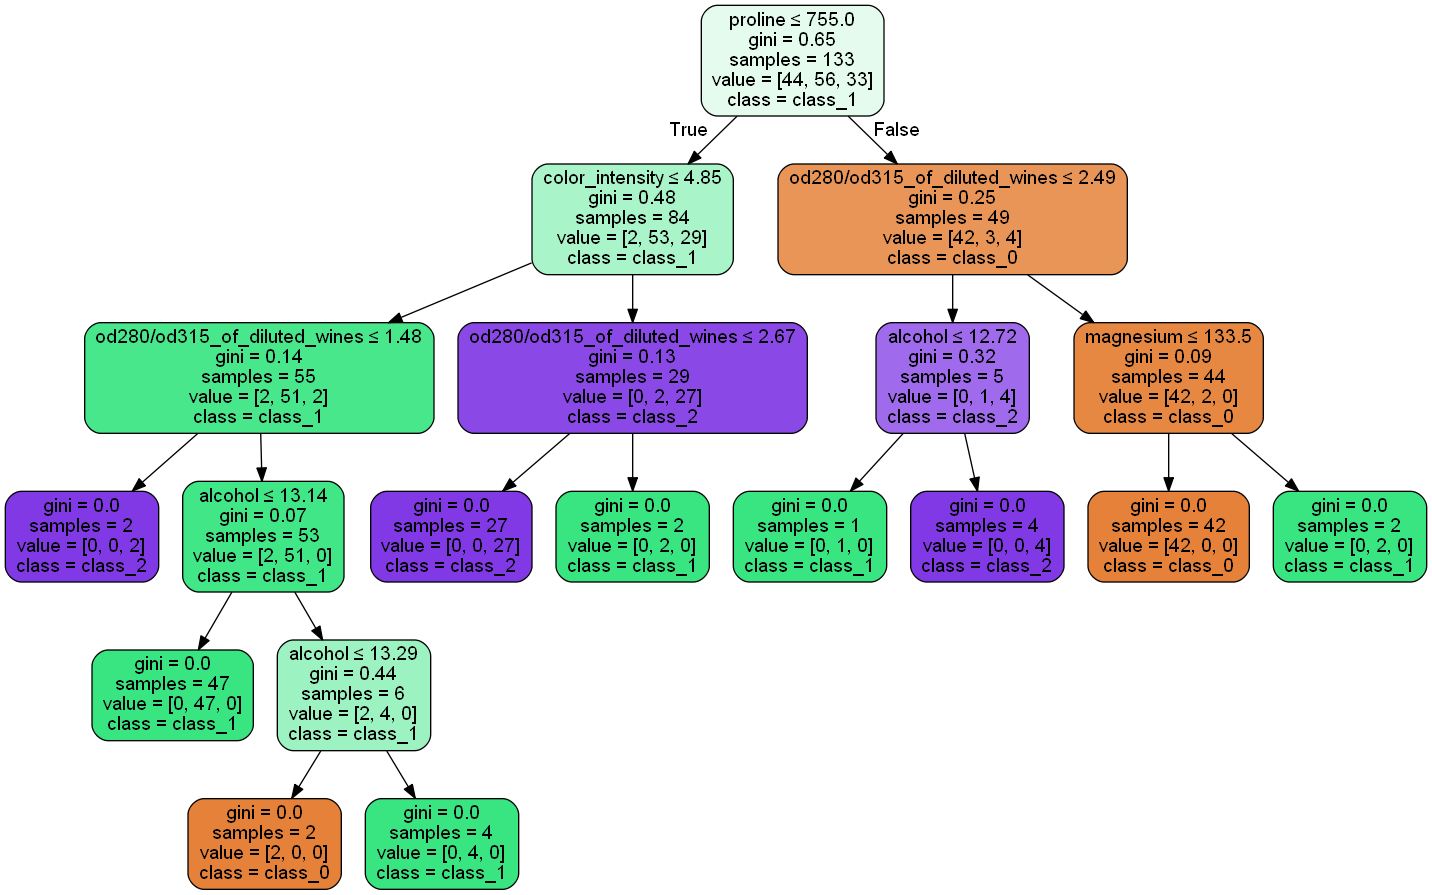

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                feature_names = wine.feature_names,
                class_names = wine.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### DecisionTreeClassifier
- criterion:default(gini) gini, entropy 計算資訊增益度的方式
- max_depth: default(None) 決策樹最大深度
- min_samples_split: default(2) 最少樣本數才切分
- min_samples_leaf: default(1) 尾端葉子最少需要的樣本數

#### Gini -> Entropy

In [10]:
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(x_train, y_train)

predict = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, predict)
print("Acuuracy: ", acc)

Acuuracy:  0.9555555555555556


In [11]:
from sklearn.model_selection import GridSearchCV


clf = DecisionTreeClassifier()

param_grid = {"criterion" : ["gini", "entropy"], 
              "max_depth" : [None, 10], 
              "min_samples_split" : [2, 4, 10], 
              "min_samples_leaf" : [1, 5]}

gs = GridSearchCV(estimator = clf,
                  param_grid=param_grid,
                  scoring='balanced_accuracy',
                  cv=3,
                  n_jobs=-1)

gs = gs.fit(x_train, y_train)
print(gs.best_estimator_)
pd.DataFrame(gs.cv_results_).iloc[:, -7:]

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


C:\Users\tony8\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.938012,0.894737,0.914141,0.915652,0.017830,9
1,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.938012,0.894737,0.944444,0.925450,0.022118,5
2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.938012,0.894737,0.944444,0.925450,0.022118,5
3,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.938012,0.885380,0.853535,0.892892,0.034766,16
4,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.938012,0.912281,0.853535,0.901994,0.035127,15
5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.890165,0.894737,0.853535,0.879869,0.018299,19
6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.938012,0.894737,0.914141,0.915652,0.017830,9
7,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.890165,0.894737,0.944444,0.909261,0.024392,14
8,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.938012,0.912281,0.944444,0.931385,0.013910,4
9,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.890165,0.912281,0.853535,0.885805,0.024089,17


In [12]:
predict = gs.best_estimator_.predict(x_test)

acc = metrics.accuracy_score(y_test, predict)
print("Acuuracy: ", acc)

Acuuracy:  0.9777777777777777
